In [1]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import cooler
import bioframe

import cooltools
import cooltools.expected
from cooltools import snipping

import cooltools.lib.plotting
# Set up parallelization
import multiprocess

from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
from scipy import interpolate
from mpl_toolkits.axes_grid import make_axes_locatable
import pyBigWig
import csv

from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan

# Import python package for working with cooler files and tools for analysis
from cooltools.insulation import calculate_insulation_score, find_boundaries

import cooltools.eigdecomp
import cooltools.saddle
from scipy.stats import pearsonr
import scipy
from scipy.linalg import toeplitz
from matplotlib.patches import ConnectionPatch  

<ipython-input-1-3600e5ab4c9f>:22: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import make_axes_locatable


In [121]:
pyBigWig.__version__

'0.3.18'

In [8]:
#### cooler ####
clr_N2 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_30_1000_raw.cool')
clr_CEP01 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_spreadingrev/CEP01_JK51_JK52_CEP01_30_1000_raw.cool')
clr_LS01 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_spreadingrev/LS01_JK19_combined_JK53_LS01_v5_30_1000_raw.cool')
clr_JK04 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK102_JK123_30_1000_raw.cool')

#### cooler ####
clr_N2_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_30_5000_raw.cool')
clr_CEP01_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_spreadingrev/CEP01_JK51_JK52_CEP01_30_5000_raw.cool')
clr_LS01_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_spreadingrev/LS01_JK19_combined_JK53_LS01_v5_30_5000_raw.cool')
clr_JK04_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK102_JK123_30_5000_raw.cool')

#### cooler for division ####
clr_N2_CEP01 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_CEP01_30_1000_raw.cool')
clr_N2_LS01 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_LS01_v5_30_1000_raw.cool')
clr_N2_JK04 = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_JK04_30_1000_raw.cool')

clr_N2_CEP01_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_CEP01_30_5000_raw.cool')
clr_N2_LS01_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_LS01_v5_30_5000_raw.cool')
clr_N2_JK04_5kb = cooler.Cooler('/scratch/cgsb/ercan/juicerToh5_2021/hicTocool_raw/JK15_JK89_JK90_JK04_30_5000_raw.cool')



In [30]:
#### bw ####
bw_N2 = pyBigWig.open("/scratch/kimj50/Jun_ChIP/spreading_revision_v4/L3_rescale_ratio_bw_avg_manual/FIX/N2_avg_JK64_JK65_JK66_MAPQ1_ratio_L3_rescale_AcenterFIX.bw")
bw_CEP01 = pyBigWig.open("/scratch/kimj50/Jun_ChIP/spreading_revision_v4/L3_rescale_ratio_bw_avg_manual/FIX/CEP01_avg_JK67_JK68_JK69_MAPQ1_ratio_L3_rescale_AcenterFIX.bw")
bw_LS01 = pyBigWig.open("/scratch/kimj50/Jun_ChIP/spreading_revision_v4/L3_rescale_ratio_bw_avg_manual/FIX/LS01_avg_JK70_JK71_JK72_MAPQ1_ratio_L3_rescale_AcenterFIX.bw")
bw_JK04 = pyBigWig.open("/scratch/kimj50/Jun_ChIP/spreading_revision_v4/L3_rescale_ratio_bw_avg_manual/FIX/JK04_avg_AKM365_JK116_JK97_MAPQ1_ratio_L3_rescale_AcenterFIX.bw")

bw_active_N2 = pyBigWig.open("/scratch/kimj50/ChIP_manual_2022_v2/L3_histone_MAPQ1_ratio_bw/H3K27ac_mod5054_ME5_input_mod5054_ME5_ce10_MAPQ1_ratio.bw")
bw_active_CEP01 = pyBigWig.open("/scratch/kimj50/ChIP_manual_2022_v2/L3_histone_MAPQ1_ratio_bw/H3K27ac_mod5054_ME5_input_mod5054_ME5_CEP01_MAPQ1_ratio.bw")
bw_active_JK04 = pyBigWig.open("/scratch/kimj50/ChIP_manual_2022_v2/L3_histone_MAPQ1_ratio_bw/H3K27ac_mod5054_ME5_input_mod5054_ME5_JK04_MAPQ1_ratio.bw")
bw_active_LS01 = pyBigWig.open("/scratch/kimj50/ChIP_manual_2022_v2/L3_histone_MAPQ1_ratio_bw/H3K27ac_mod5054_ME5_input_mod5054_ME5_LS01_v5_MAPQ1_ratio.bw")

bw_inactive = pyBigWig.open("/home/kimj50/modencode/H3K27me3_N2_L3_5045_mod11_input_mod9_ratio.bw")


In [4]:
ce10_center = bioframe.read_table("/home/kimj50/ce10_sub/center.bed",schema='bed3')
ce10_center = bioframe.parse_regions(ce10_center)
########## insertion sites ##########
rex_annot = bioframe.read_table("/scratch/kimj50/annotation/sarah_strong_annot.bed",schema='bed')
CEP01_annot = bioframe.read_table("/scratch/kimj50/annotation/CEP01_trugenome.bed",schema='bed')
LS01_annot = bioframe.read_table("/scratch/kimj50/annotation/LS01_trugenome.bed",schema='bed')
JK04_annot = bioframe.read_table("/scratch/kimj50/annotation/JK04_trugenome.bed",schema='bed')

groseq_annot = bioframe.read_table("/scratch/kimj50/annotation/groseq_L3_ce10Lift.bed",schema='bed')

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [94]:
annotations = [CEP01_annot,JK04_annot,LS01_annot]
annotations[2].iloc[2]['start']

8453058

NameError: name 'annotations' is not defined

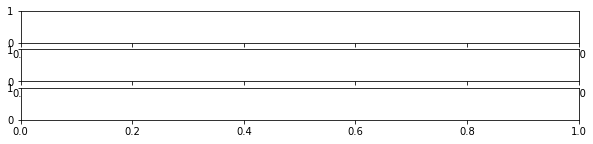

In [6]:
groseq_annot
start1, end1 = 8_300_000, 8_530_000

def genes_region(bed6,chrom,start,end):
    bed6_c = bed6[bed6['chrom'] == chrom]
    bed6_cr = bed6_c[np.logical_and(bed6_c['start']>start,bed6_c['end']<end)]
    return(bed6_cr)
t = genes_region(groseq_annot,'chrII',start1,end1)

f, axs = plt.subplots(
    figsize=(10, 2),
    nrows=3,
    ncols=1,
    sharex='row',
    sharey=False
)



for g in range(len(t)):
    hl = (t.iloc[g]['end']-t.iloc[g]['start'])//2
    if t.iloc[g]['strand']=='+':
        xi = t.iloc[g]['start']
        xf = t.iloc[g]['end']
        ypos = 0.2
        arrow_c = 'blue'            
    if t.iloc[g]['strand']=='-':
        xi = t.iloc[g]['end']
        xf = t.iloc[g]['start']
        ypos = -0.2
        arrow_c = 'red'
        
    for r in range(len(annotations[0])):
        annot_i = annotations[0]
        if xi>annot_i.iloc[r]['start']:
            rex_s = annot_i.iloc[r]['end']-annot_i.iloc[r]['start'] 
            xi=xi+rex_s
            xf=xf+rex_s
    axs[0].arrow(x=xi,y=ypos,dy=0,dx=xf-xi,
              length_includes_head=True,width=0.2,head_width=0.2,
                  head_length=hl,
                  color=arrow_c)

        
    for r in range(len(annotations[1])):
        annot_i = annotations[1]
        if xi>annot_i.iloc[r]['start']:
            rex_s = annot_i.iloc[r]['end']-annot_i.iloc[r]['start'] 
            xi=xi+rex_s
            xf=xf+rex_s
    axs[1].arrow(x=xi,y=ypos,dy=0,dx=xf-xi,
              length_includes_head=True,width=0.2,head_width=0.2,
                  head_length=hl,
                  color=arrow_c)
    
    for r in range(len(annotations[2])):
        annot_i = annotations[2]
        if xi>annot_i.iloc[r]['start']:
            rex_s = annot_i.iloc[r]['end']-annot_i.iloc[r]['start'] 
            xi=xi+rex_s
            xf=xf+rex_s
    axs[2].arrow(x=xi,y=ypos,dy=0,dx=xf-xi,
              length_includes_head=True,width=0.2,head_width=0.2,
                  head_length=hl,
                  color=arrow_c)

    
    
print(t)    
#    t.iloc[0]['start']
#ax.plot()

In [11]:
def scaling_agg(input_clr,input_regions):
    cvd = cooltools.expected.diagsum(
        clr=input_clr,
        regions=input_regions,
        transforms={'balanced': lambda p: p['count']*p['weight1']*p['weight2']}
    )
    lb_cvd, lb_slopes, lb_distbins = cooltools.expected.logbin_expected(cvd)
    lb_cvd_agg, lb_slopes_agg = cooltools.expected.combine_binned_expected(
        lb_cvd,
        binned_exp_slope=lb_slopes
    )
    lb_cvd_agg['s_bp'] = lb_cvd_agg['diag.avg'] * input_clr.binsize
    lb_slopes_agg['s_bp'] = lb_slopes_agg['diag.avg'] * input_clr.binsize
    x = np.array(lb_slopes_agg['s_bp'])
    y = np.array(lb_slopes_agg['slope'])
    loop_size = x[argrelextrema(y, np.greater)]
    return(lb_cvd_agg,lb_slopes_agg,loop_size)

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)
        
def add_mid(input):
    input['chrom']=input['chrom'].str.replace('chr','')
    input['mid']=(input.end+input.start)//2
    return input

def add_windows(input,chromsizes):
    w = snipping.make_bin_aligned_windows(
        resolution,
        input['chrom'],input['mid'],flank_bp=flank)
    w['strand']='.'
    w = snipping.assign_regions(w, chromsizes)
    return w

nthreads = 2
def my_expected(clr,regions):
    with multiprocess.Pool(nthreads) as pool:
        expected = cooltools.expected.diagsum(
            clr,
            regions=regions,
            transforms={
                'balanced': lambda p: p['count'] * p['weight1'] * p['weight2']
            },
            map=pool.map
        )
    expected['balanced.avg'] = expected['balanced.sum'] / expected['n_valid']
    return(expected)

def mtx_expected(mat,region):
    with multiprocess.Pool(nthreads) as pool:
        expected = cooltools.expected.diagsum(
            clr=mat,
            regions=region,
            transforms={'balanced': lambda p: p['count']*p['weight1']*p['weight2']})
        expected['balanced.avg'] = expected['balanced.sum'] / expected['n_valid']
    return(expected)


def my_pup_clr(clr,windows,regions):
    clr_snipper = cooltools.snipping.CoolerSnipper(clr, regions=regions)
    with multiprocess.Pool(nthreads) as pool:
        clr_stack = cooltools.snipping.pileup(
            windows,
            clr_snipper.select,
            clr_snipper.snip,
            map=pool.map
            )
    clr_avg = np.nanmean(clr_stack, axis=2)
    return clr_avg

def my_pup_oe(clr,windows,regions,expected):
    expected_snipper = cooltools.snipping.ObsExpSnipper(clr, expected, regions=regions)
    with multiprocess.Pool(nthreads) as pool:
        oe_stack = cooltools.snipping.pileup(
            windows,
            expected_snipper.select,
            expected_snipper.snip,
            map=pool.map
        )
    expected_avg = np.nanmean(oe_stack, axis=2)
    return expected_avg

def bwTobedMatrix(bw,region,nbins):
    lst_region = [region['start'],region['end']]
    lst_bw = []
    for i in range(0,len(lst_region[0])):
        chrom = "".join(['chr', region['chrom'][i]]) # bw uses 'chrI', my bed uses 'I'
        if lst_region[1].reset_index(drop=True)[i] < bw.chroms(chrom):
            v = bw.stats(chrom,
                         lst_region[0].reset_index(drop=True)[i],
                         lst_region[1].reset_index(drop=True)[i],
                         type='mean',nBins=nbins)
            
            lst_bw.append(pd.to_numeric(v,errors='coerce'))
    return(lst_bw)

def bwTobedMatrix1(bw,region,nbins):
    lst_region = [region['start'],region['end']]
    lst_bw = []
    for i in range(0,len(lst_region[0])):
        chrom = region['chrom'][i] # bw uses 'chrI', my bed uses 'I'
        if lst_region[1].reset_index(drop=True)[i] < bw.chroms(chrom):
            v = bw.stats(chrom,
                         lst_region[0].reset_index(drop=True)[i],
                         lst_region[1].reset_index(drop=True)[i],
                         type='mean',nBins=nbins)
            
            lst_bw.append(pd.to_numeric(v,errors='coerce'))
    return(lst_bw)

def compute_Amean(bigwig):
    chroms = ["chrI","chrII","chrIII","chrIV","chrV"]
    bw_stats = []
    for i in range(len(chroms)):
        stat_i = bigwig.stats(chroms[i],type="mean")[0]
        bw_stats.append(stat_i)
    return np.nanmean(bw_stats)

def cgi_region(clr,region):
    cg = adaptive_coarsegrain(clr.matrix(balance=True).fetch(region),
                              clr.matrix(balance=False).fetch(region),
                              cutoff=3, max_levels=8)
    cgi = interp_nan(cg)
    return(cgi)
def agg(clr,region,bs):
    cvd = cooltools.expected.diagsum(
    clr=clr,
    regions=region,
    transforms={'balanced': lambda p: p['count']*p['weight1']*p['weight2']})
    
    cvd_agg = (
        cvd
        .groupby('diag')
        .agg(
            {'n_valid':'sum',
             'count.sum':'sum',
             'balanced.sum':'sum',
            })
        .reset_index()
    )
    cvd_agg['s_bp'] = (
        cvd_agg['diag'] * bs)
    cvd_agg['count.avg'] = (
        cvd_agg['count.sum'] / cvd_agg['n_valid']
    )
    cvd_agg['balanced.avg'] = (
        cvd_agg['balanced.sum'] / cvd_agg['n_valid']
    )
    return(cvd_agg)


def bed3_mids(bed3plus,chrom,start,end):
    a = bed3plus[bed3plus['chrom']==chrom].reset_index()
    mid = (a['start']+a['end'])//2
    mid_bool = np.logical_and((mid > start), (mid < end))
    a['mid'] = mid
    return(a[mid_bool].reset_index())


def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

In [10]:
clrs_division_5kb = [clr_N2_5kb,clr_N2_CEP01_5kb,clr_N2_LS01_5kb,clr_N2_JK04_5kb]

len(clrs_division_5kb)

4

In [9]:

clrs_5kb = [clr_N2_5kb,clr_CEP01_5kb,clr_JK04_5kb,clr_LS01_5kb]
clrs_5kb_division = [clr_N2_5kb,clr_N2_CEP01_5kb,clr_N2_JK04_5kb,clr_N2_LS01_5kb]
clrs_1kb = [clr_N2,clr_CEP01,clr_JK04,clr_LS01]
clrs_1kb_division = [clr_N2,clr_N2_CEP01,clr_N2_JK04,clr_N2_LS01]


windows_5kb = [50000,60000]
windows_1kb = [12000,16000]
clrs_5kb_ins = []
clrs_5kb_division_ins = []
clrs_1kb_ins = []
clrs_1kb_division_ins = []

for i in range(len(clrs_5kb)):
    x = calculate_insulation_score(clrs_5kb[i], windows_5kb, verbose=True)
    clrs_5kb_ins.append(x)
    x = calculate_insulation_score(clrs_5kb_division[i], windows_5kb, verbose=True)
    clrs_5kb_division_ins.append(x)

    x = calculate_insulation_score(clrs_1kb[i], windows_1kb, verbose=True)
    clrs_1kb_ins.append(x)
    x = calculate_insulation_score(clrs_1kb_division[i], windows_1kb, verbose=True)
    clrs_1kb_division_ins.append(x)



INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:root:Processing I
INFO:root:Processing II
INFO:root:Processing III
INFO:root:Processing IV
INFO:root:Processing V
INFO:root:Processing X
INFO:r

<ipython-input-35-d745fafd67ec>:232: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout(h_pad=-5, w_pad=1)


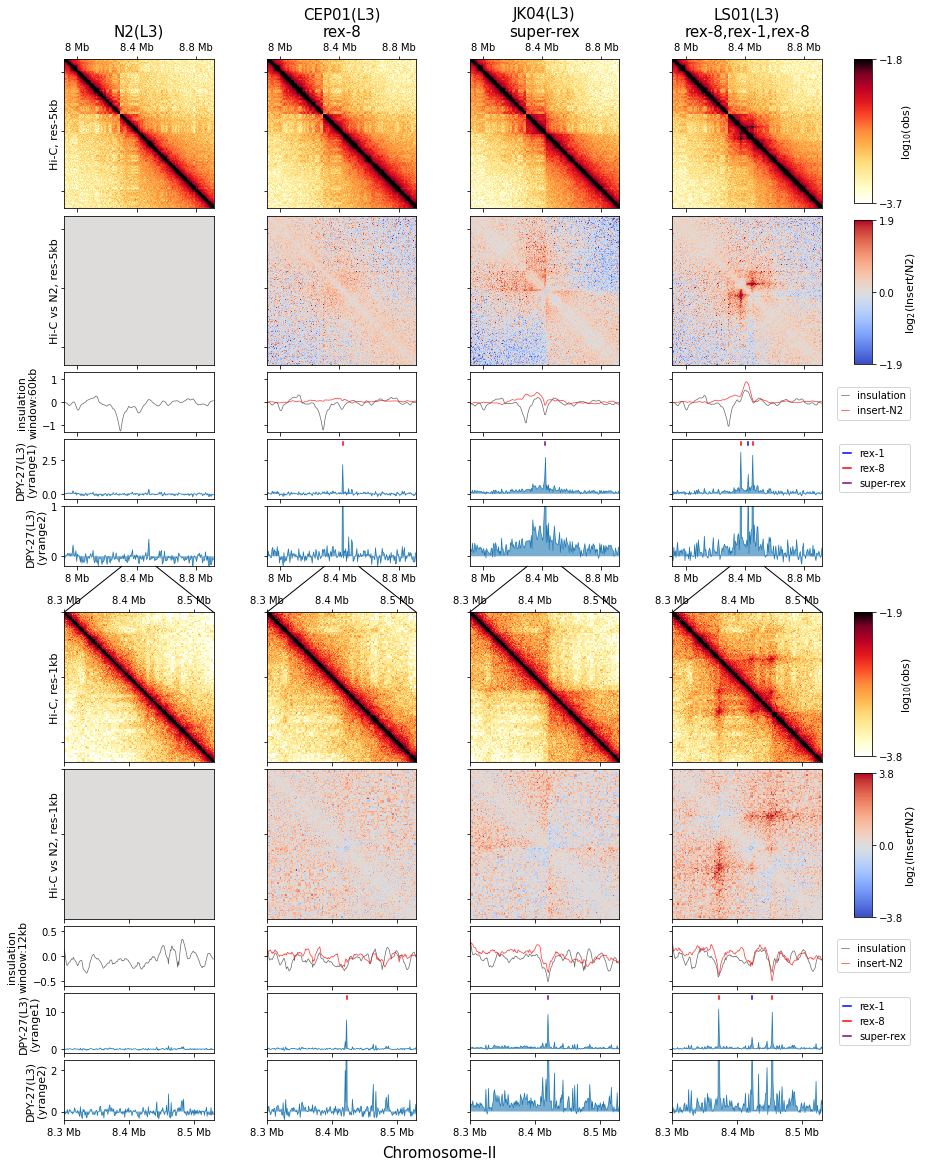

In [35]:
####################### plot chrII #########################
f, axs = plt.subplots(
    figsize=(12, 16),
    nrows=2,
    ncols=4,
    sharex='row',
    sharey=False
)
region0 = 'II:7,910,000-8,920,000'
start0, end0 = 7_910_000, 8_920_000

region1 = 'II:8,300,000-8,530,000'
start1, end1 = 8_300_000, 8_530_000

regions = [region0,region1]
starts = [start0,start1]
ends = [end0,end1]
chrom = 'chrII'

#### data ####
# clrs #
clrs_5kb = [clr_N2_5kb,clr_CEP01_5kb,clr_JK04_5kb,clr_LS01_5kb]
clrs_1kb = [clr_N2,clr_CEP01,clr_JK04,clr_LS01]
clrs_5kb_division = [clr_N2_5kb,clr_N2_CEP01_5kb,clr_N2_JK04_5kb,clr_N2_LS01_5kb]
clrs_1kb_division = [clr_N2,clr_N2_CEP01,clr_N2_JK04,clr_N2_LS01]

clrs = [clrs_5kb,clrs_1kb]
clrs_division = [clrs_5kb_division,clrs_1kb_division]

# bws #
bws = [bw_N2,bw_CEP01,bw_JK04,bw_LS01]

# ins #
ins = [clrs_5kb_ins,clrs_1kb_ins]
ins_division = [clrs_5kb_division_ins,clrs_1kb_division_ins]
ins_window = [60000,12000]


##############
annotations = [CEP01_annot,JK04_annot,LS01_annot]

#### global param ####
minmax_o = [[-3.7,-1.8],[-3.8,-1.9]]
minmax_oe = [[-1.9,1.9],[-3.8,3.8]]
minmax_ins = [[-1.3,1.3],[-0.6,0.6]]
minmax_bw1 = [[-0.4,4],[-1,15]]
minmax_bw2 = [[-0.2,1],[-0.4,2.5]]
pad_param = 0.1

#### global asthetics #####
rex_colors = ['blue','red','purple']
ticks = [[8_000_000,8_400_000,8_800_000],[8_300_000,8_400_000,8_500_000]]
sub_titles = ['N2(L3)', 'CEP01(L3)\nrex-8','JK04(L3)\nsuper-rex','LS01(L3)\nrex-8,rex-1,rex-8']
ylabels = ['Hi-C','Hi-C vs N2','insulation','DPY-27(L3)\n(yrange1)','DPY-27(L3)\n(yrange2)']        
ylabels_fontsize = 11
bigFont = 15


np.seterr(invalid='ignore')
for i in range(4): # loop throgh row
    for j in range(2): # loop through col
        extents = (starts[j], ends[j], ends[j], starts[j])
        ####### obs hic ######
        ax_o = axs[j,i]
        clr_region = cgi_region(clrs[j][i],regions[j])
        im = ax_o.matshow(
            np.log10(clr_region),
            cmap='fall',
            vmin=minmax_o[j][0],vmax=minmax_o[j][1],
            extent=extents)
        divider = make_axes_locatable(ax_o)
        
        ####### fake zooming #######
        if j == 1:
            xy0 = (starts[1],minmax_bw2[0][0])
            xy1 = (starts[1],starts[1])
            xy2 = (ends[1],minmax_bw2[0][0])
            xy3 = (ends[1],starts[1])

            con01 = ConnectionPatch(xyA=xy1, xyB=xy0,coordsA="data", coordsB="data",
                                    axesA=ax_o, axesB=ax2, color="black")
            con02 = ConnectionPatch(xyA=xy3, xyB=xy2,coordsA="data", coordsB="data",
                                    axesA=ax_o, axesB=ax2, color="black")
            ax2.add_artist(con01)
            ax2.add_artist(con02)
        #############################
        
        
        ####### obs/obs control #######
        ax_oe = divider.append_axes("bottom", size="100%", pad=pad_param,sharex=ax_o)
        clr_region_division = cgi_region(clrs_division[j][i],regions[j])
        im_oe = ax_oe.matshow(
            np.log2(np.divide(clr_region,clr_region_division)),
            cmap='coolwarm',
            vmin=minmax_oe[j][0],vmax=minmax_oe[j][1],
            extent=extents)

        ####### insulation ####
        ax = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
        ins_region = bioframe.select(ins[j][i], regions[j])
        ins_div_region = bioframe.select(ins_division[j][i], regions[j])
        
        xval=ins_region[['start', 'end']].mean(axis=1)
        if j == 0:
            yval=np.array(ins_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
            yval_div=np.array(ins_div_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
        if j == 1:
            yval=np.array(ins_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
            yval_div=np.array(ins_div_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
        mask = np.isfinite(yval)
        ax.plot(xval[mask], 
                yval[mask],color='black',alpha=0.6,lw=0.7,label='insulation')
        if i > 0:
            ax.plot(xval[mask],
                    np.subtract(yval[mask],yval_div[mask]),color='red',lw=0.7,alpha=0.8,label='insert-N2')
        ax.set_ylim([minmax_ins[j][0],minmax_ins[j][1]])

        plt.xlim([xval.min(), xval.max()])
        
        
        ####### dpy27 yrange1 ######
        ax1 = divider.append_axes("bottom", size="40%", pad=pad_param, sharex=ax_o)
        bw_region = bws[i].stats(chrom,starts[j], ends[j],type="mean",nBins=len(clr_region))
        xval = np.linspace(starts[j], ends[j], len(clr_region))
        yval = np.array(bw_region, dtype=float)
        mask = np.isfinite(yval)
        ax1.plot(
            xval[mask],
            yval[mask],lw=0.7)
        plt.fill_between(xval[mask],0,yval[mask],interpolate=False,alpha=0.6)
        ax1.set_ylim([minmax_bw1[j][0],minmax_bw1[j][1]])
        plt.xlim([xval.min(), xval.max()])
        
        ####### dpy27 yrange2 ######
        ax2 = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
        ax2.plot(
            xval[mask],
            yval[mask],lw=0.7)
        plt.fill_between(xval[mask],0,yval[mask],interpolate=False,alpha=0.6)
        ax2.set_ylim([minmax_bw2[j][0],minmax_bw2[j][1]])
        plt.xlim([xval.min(), xval.max()])
        
        ####### rex annotation ######
        if i > 0:
            annot_i = bed3_mids(annotations[i-1],'II',starts[j],ends[j])
            for a in range(len(annot_i)):
                if annot_i['name'][a] in ['rex-1','rex-1snp']:
                    ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[0],alpha=1,label='rex-1')
                if annot_i['name'][a] in ['rex-8','rex-8left','rex-8right']:
                    ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[1],alpha=1,label='rex-8')
                if annot_i['name'][a] in ['superRex']:
                    ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[2],alpha=1,label='super-rex')
                            
        
        
    
    
        ######### ticks and labels ########
        format_ticks(ax_o,x=True,y=True,rotate=False)
        format_ticks(ax2,x=True,y=False,rotate=False)
        ax_o.tick_params(axis="both", bottom=True, top=True, labelbottom=False, labeltop=True, left=True,labelleft=False)
        ax_oe.tick_params(axis="both", bottom=True, top=False, labelbottom=False, labeltop=False,left=True,labelleft=False)
        ax_o.set_xticks(ticks[j])
        ax_o.set_yticks(ticks[j])
        ax_oe.set_xticks(ticks[j])
        ax_oe.set_yticks(ticks[j])
        if j == 0 :
            ax_o.set_title(sub_titles[i],fontsize=bigFont)

        ax1.set_xticks(ticks[j])
        ax2.set_xticks(ticks[j])
        if i == 0:
            ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)            
            ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)
            ax2.tick_params(axis="both", bottom=True, labelbottom=True, left=True,labelleft=True)
            
            ax.set_ylabel(ylabels[2]+'\nwindow:'+str(ins_window[j]//1000)+'kb',fontsize=ylabels_fontsize)
            ax1.set_ylabel(ylabels[3],fontsize=ylabels_fontsize)
            ax2.set_ylabel(ylabels[4],fontsize=ylabels_fontsize)
            if j == 0:
                ax_o.set_ylabel(ylabels[0]+', res-5kb',fontsize=ylabels_fontsize)
                ax_oe.set_ylabel(ylabels[1]+', res-5kb',fontsize=ylabels_fontsize)
            if j == 1:
                ax_o.set_ylabel(ylabels[0]+', res-1kb',fontsize=ylabels_fontsize)
                ax_oe.set_ylabel(ylabels[1]+', res-1kb',fontsize=ylabels_fontsize)
                
        else:
            ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
            ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
            ax2.tick_params(axis="both", bottom=True, labelbottom=True, left=True,labelleft=False)
        ## cbar ##
        if i == 3:
            if j == 0:
                cbaxes_o = f.add_axes([1, .82, 0.02, 0.125])
                cbaxes_oe = f.add_axes([1, .68, 0.02, 0.125])
            if j == 1:
                cbaxes_o = f.add_axes([1, .34, 0.02, 0.125]) 
                cbaxes_oe = f.add_axes([1, .20, 0.02, 0.125])
            cbar = plt.colorbar(im, cax = cbaxes_o,ticks=minmax_o[j])
            cbar.ax.get_yaxis().labelpad = -3
            cbar.ax.set_ylabel('$\log_{10}$(obs)', rotation=90,fontsize=ylabels_fontsize)
            
            cbar = plt.colorbar(im_oe, cax = cbaxes_oe,ticks=[minmax_oe[j][0],0,minmax_oe[j][1]])
            cbar.ax.get_yaxis().labelpad = 1
            cbar.ax.set_ylabel('$\log_{2}$(Insert/N2)', rotation=90,fontsize=ylabels_fontsize)
        

        ## insulation legend ##    
        if i == 3:
            ins_legends = ax.get_legend_handles_labels()
            if j == 0:
                f.legend(ins_legends[0],ins_legends[1], bbox_to_anchor=(1.07, 0.665), prop={'size': 10}, handlelength=0.8)
            if j == 1:
                f.legend(ins_legends[0],ins_legends[1], bbox_to_anchor=(1.07, 0.185), prop={'size': 10}, handlelength=0.8)
        
        ## rex legend ##
        if i == 2 and j == 1:
            LS01_legends = ax1.get_legend_handles_labels()
        if i == 3 and j == 1:
            JK04_legends = ax1.get_legend_handles_labels()
            handles, labels = [(a + b) for a, b in zip(LS01_legends, JK04_legends)]
            by_label = dict(zip(labels, handles))
            reorder=[2,1,0]
            leg = f.legend([list(by_label.values())[i] for i in reorder], [list(by_label.keys())[i] for i in reorder],
                           bbox_to_anchor=(1.07, 0.615),prop={'size': 10},handlelength=0.8)
            leg = f.legend([list(by_label.values())[i] for i in reorder], [list(by_label.keys())[i] for i in reorder],
                           bbox_to_anchor=(1.07, 0.135),prop={'size': 10},handlelength=0.8)



f.text(0.52, -0.008, 'Chromosome-II', ha='center',fontsize=bigFont)
f.tight_layout(h_pad=-5, w_pad=1)
#plt.tight_layout()



In [36]:
f.savefig('/scratch/cgsb/ercan/Jun_HiC/spreading/spreading_revision_v7/Fig5_ectopic_HiC.pdf',dpi=1200,bbox_inches='tight')

<ipython-input-37-e0a894f6232a>:209: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout(h_pad=-5, w_pad=1)


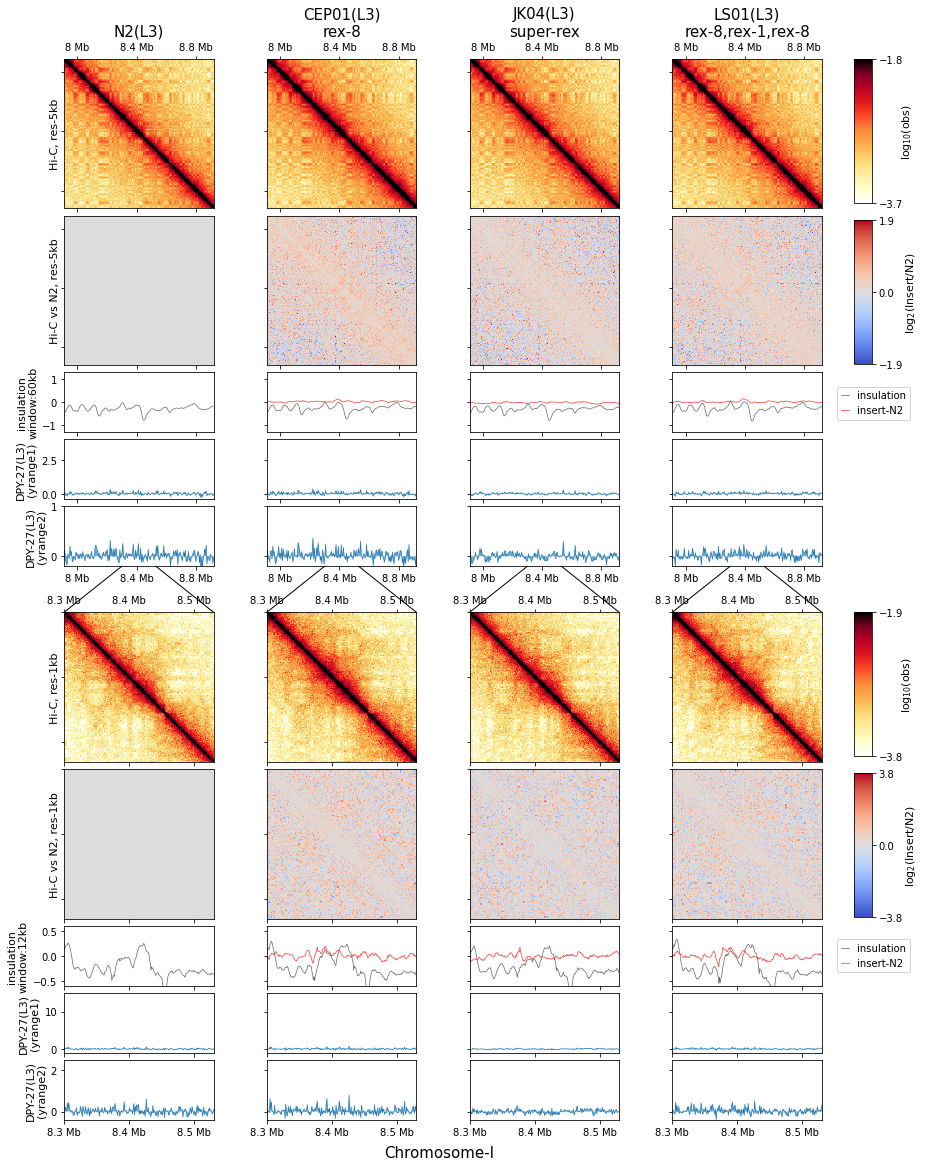

In [37]:
####################### plot chrI #########################
f, axs = plt.subplots(
    figsize=(12, 16),
    nrows=2,
    ncols=4,
    sharex='row',
    sharey=False
)
region0 = 'I:7,910,000-8,920,000'
start0, end0 = 7_910_000, 8_920_000

region1 = 'I:8,300,000-8,530,000'
start1, end1 = 8_300_000, 8_530_000

regions = [region0,region1]
starts = [start0,start1]
ends = [end0,end1]
chrom = 'chrI'

#### data ####
# clrs #
clrs_5kb = [clr_N2_5kb,clr_CEP01_5kb,clr_JK04_5kb,clr_LS01_5kb]
clrs_1kb = [clr_N2,clr_CEP01,clr_JK04,clr_LS01]
clrs_5kb_division = [clr_N2_5kb,clr_N2_CEP01_5kb,clr_N2_JK04_5kb,clr_N2_LS01_5kb]
clrs_1kb_division = [clr_N2,clr_N2_CEP01,clr_N2_JK04,clr_N2_LS01]

clrs = [clrs_5kb,clrs_1kb]
clrs_division = [clrs_5kb_division,clrs_1kb_division]

# bws #
bws = [bw_N2,bw_CEP01,bw_JK04,bw_LS01]

# ins #
ins = [clrs_5kb_ins,clrs_1kb_ins]
ins_division = [clrs_5kb_division_ins,clrs_1kb_division_ins]
ins_window = [60000,12000]


##############
annotations = [CEP01_annot,JK04_annot,LS01_annot]

#### global param ####
minmax_o = [[-3.7,-1.8],[-3.8,-1.9]]
minmax_oe = [[-1.9,1.9],[-3.8,3.8]]
minmax_ins = [[-1.3,1.3],[-0.6,0.6]]
minmax_bw1 = [[-0.4,4],[-1,15]]
minmax_bw2 = [[-0.2,1],[-0.4,2.5]]
pad_param = 0.1

#### global asthetics #####
rex_colors = ['blue','red','purple']
ticks = [[8_000_000,8_400_000,8_800_000],[8_300_000,8_400_000,8_500_000]]
sub_titles = ['N2(L3)', 'CEP01(L3)\nrex-8','JK04(L3)\nsuper-rex','LS01(L3)\nrex-8,rex-1,rex-8']
ylabels = ['Hi-C','Hi-C vs N2','insulation','DPY-27(L3)\n(yrange1)','DPY-27(L3)\n(yrange2)']        
ylabels_fontsize = 11
bigFont = 15


np.seterr(invalid='ignore')
for i in range(4): # loop throgh row
    for j in range(2): # loop through col
        extents = (starts[j], ends[j], ends[j], starts[j])
        ####### obs hic ######
        ax_o = axs[j,i]
        clr_region = cgi_region(clrs[j][i],regions[j])
        im = ax_o.matshow(
            np.log10(clr_region),
            cmap='fall',
            vmin=minmax_o[j][0],vmax=minmax_o[j][1],
            extent=extents)
        divider = make_axes_locatable(ax_o)
        
        ####### fake zooming #######
        if j == 1:
            xy0 = (starts[1],minmax_bw2[0][0])
            xy1 = (starts[1],starts[1])
            xy2 = (ends[1],minmax_bw2[0][0])
            xy3 = (ends[1],starts[1])

            con01 = ConnectionPatch(xyA=xy1, xyB=xy0,coordsA="data", coordsB="data",
                                    axesA=ax_o, axesB=ax2, color="black")
            con02 = ConnectionPatch(xyA=xy3, xyB=xy2,coordsA="data", coordsB="data",
                                    axesA=ax_o, axesB=ax2, color="black")
            ax2.add_artist(con01)
            ax2.add_artist(con02)
        #############################
        
        
        ####### obs/obs control #######
        ax_oe = divider.append_axes("bottom", size="100%", pad=pad_param,sharex=ax_o)
        clr_region_division = cgi_region(clrs_division[j][i],regions[j])
        im_oe = ax_oe.matshow(
            np.log2(np.divide(clr_region,clr_region_division)),
            cmap='coolwarm',
            vmin=minmax_oe[j][0],vmax=minmax_oe[j][1],
            extent=extents)

        ####### insulation ####
        ax = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
        ins_region = bioframe.select(ins[j][i], regions[j])
        ins_div_region = bioframe.select(ins_division[j][i], regions[j])
        
        xval=ins_region[['start', 'end']].mean(axis=1)
        if j == 0:
            yval=np.array(ins_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
            yval_div=np.array(ins_div_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
        if j == 1:
            yval=np.array(ins_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
            yval_div=np.array(ins_div_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
        mask = np.isfinite(yval)
        ax.plot(xval[mask], 
                yval[mask],color='black',alpha=0.6,lw=0.7,label='insulation')
        if i > 0:
            ax.plot(xval[mask],
                    np.subtract(yval[mask],yval_div[mask]),color='red',lw=0.7,alpha=0.8,label='insert-N2')
        ax.set_ylim([minmax_ins[j][0],minmax_ins[j][1]])

        plt.xlim([xval.min(), xval.max()])
        
        
        ####### dpy27 yrange1 ######
        ax1 = divider.append_axes("bottom", size="40%", pad=pad_param, sharex=ax_o)
        bw_region = bws[i].stats(chrom,starts[j], ends[j],type="mean",nBins=len(clr_region))
        xval = np.linspace(starts[j], ends[j], len(clr_region))
        yval = np.array(bw_region, dtype=float)
        mask = np.isfinite(yval)
        ax1.plot(
            xval[mask],
            yval[mask],lw=0.7)
        plt.fill_between(xval[mask],0,yval[mask],interpolate=False,alpha=0.6)
        ax1.set_ylim([minmax_bw1[j][0],minmax_bw1[j][1]])
        plt.xlim([xval.min(), xval.max()])
        
        ####### dpy27 yrange2 ######
        ax2 = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
        ax2.plot(
            xval[mask],
            yval[mask],lw=0.7)
        plt.fill_between(xval[mask],0,yval[mask],interpolate=False,alpha=0.6)
        ax2.set_ylim([minmax_bw2[j][0],minmax_bw2[j][1]])
        plt.xlim([xval.min(), xval.max()])
                                    
        
        
    
    
        ######### ticks and labels ########
        format_ticks(ax_o,x=True,y=True,rotate=False)
        format_ticks(ax2,x=True,y=False,rotate=False)
        ax_o.tick_params(axis="both", bottom=True, top=True, labelbottom=False, labeltop=True, left=True,labelleft=False)
        ax_oe.tick_params(axis="both", bottom=True, top=False, labelbottom=False, labeltop=False,left=True,labelleft=False)
        ax_o.set_xticks(ticks[j])
        ax_o.set_yticks(ticks[j])
        ax_oe.set_xticks(ticks[j])
        ax_oe.set_yticks(ticks[j])
        if j == 0 :
            ax_o.set_title(sub_titles[i],fontsize=bigFont)

        ax1.set_xticks(ticks[j])
        ax2.set_xticks(ticks[j])
        if i == 0:
            ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)            
            ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)
            ax2.tick_params(axis="both", bottom=True, labelbottom=True, left=True,labelleft=True)
            
            ax.set_ylabel(ylabels[2]+'\nwindow:'+str(ins_window[j]//1000)+'kb',fontsize=ylabels_fontsize)
            ax1.set_ylabel(ylabels[3],fontsize=ylabels_fontsize)
            ax2.set_ylabel(ylabels[4],fontsize=ylabels_fontsize)
            if j == 0:
                ax_o.set_ylabel(ylabels[0]+', res-5kb',fontsize=ylabels_fontsize)
                ax_oe.set_ylabel(ylabels[1]+', res-5kb',fontsize=ylabels_fontsize)
            if j == 1:
                ax_o.set_ylabel(ylabels[0]+', res-1kb',fontsize=ylabels_fontsize)
                ax_oe.set_ylabel(ylabels[1]+', res-1kb',fontsize=ylabels_fontsize)
                
        else:
            ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
            ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
            ax2.tick_params(axis="both", bottom=True, labelbottom=True, left=True,labelleft=False)
        ## cbar ##
        if i == 3:
            if j == 0:
                cbaxes_o = f.add_axes([1, .82, 0.02, 0.125])
                cbaxes_oe = f.add_axes([1, .68, 0.02, 0.125])
            if j == 1:
                cbaxes_o = f.add_axes([1, .34, 0.02, 0.125]) 
                cbaxes_oe = f.add_axes([1, .20, 0.02, 0.125])
            cbar = plt.colorbar(im, cax = cbaxes_o,ticks=minmax_o[j])
            cbar.ax.get_yaxis().labelpad = -3
            cbar.ax.set_ylabel('$\log_{10}$(obs)', rotation=90,fontsize=ylabels_fontsize)
            
            cbar = plt.colorbar(im_oe, cax = cbaxes_oe,ticks=[minmax_oe[j][0],0,minmax_oe[j][1]])
            cbar.ax.get_yaxis().labelpad = 1
            cbar.ax.set_ylabel('$\log_{2}$(Insert/N2)', rotation=90,fontsize=ylabels_fontsize)
        

        ## insulation legend ##    
        if i == 3:
            ins_legends = ax.get_legend_handles_labels()
            if j == 0:
                f.legend(ins_legends[0],ins_legends[1], bbox_to_anchor=(1.07, 0.665), prop={'size': 10}, handlelength=0.8)
            if j == 1:
                f.legend(ins_legends[0],ins_legends[1], bbox_to_anchor=(1.07, 0.185), prop={'size': 10}, handlelength=0.8)
        



f.text(0.52, -0.008, 'Chromosome-I', ha='center',fontsize=bigFont)
f.tight_layout(h_pad=-5, w_pad=1)
#plt.tight_layout()


In [38]:
f.savefig('/scratch/cgsb/ercan/Jun_HiC/spreading/spreading_revision_v7/Fig5s_ectopic_HiC_chrI.pdf',dpi=1200,bbox_inches='tight')

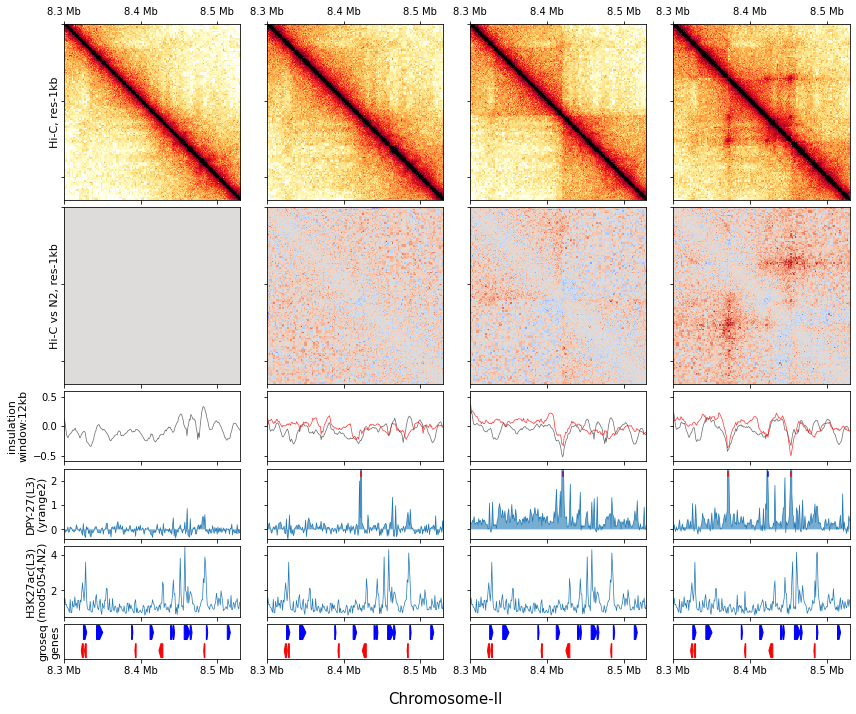

In [32]:
################## histones?
####################### plot chrII #########################
f, axs = plt.subplots(
    figsize=(12, 10),
    nrows=1,
    ncols=4,
    sharex='row',
    sharey=False
)
region0 = 'II:7,910,000-8,920,000'
start0, end0 = 7_910_000, 8_920_000

region1 = 'II:8,300,000-8,530,000'
start1, end1 = 8_300_000, 8_530_000

regions = [region0,region1]
starts = [start0,start1]
ends = [end0,end1]
chrom = 'chrII'


#### data ####
# clrs #
clrs_5kb = [clr_N2_5kb,clr_CEP01_5kb,clr_JK04_5kb,clr_LS01_5kb]
clrs_1kb = [clr_N2,clr_CEP01,clr_JK04,clr_LS01]
clrs_5kb_division = [clr_N2_5kb,clr_N2_CEP01_5kb,clr_N2_JK04_5kb,clr_N2_LS01_5kb]
clrs_1kb_division = [clr_N2,clr_N2_CEP01,clr_N2_JK04,clr_N2_LS01]

clrs = [clrs_5kb,clrs_1kb]
clrs_division = [clrs_5kb_division,clrs_1kb_division]

# bws #
bws = [bw_N2,bw_CEP01,bw_JK04,bw_LS01]
bws_active = [bw_active_N2,bw_active_JK04,bw_active_JK04,bw_active_LS01]
# ins #
ins = [clrs_5kb_ins,clrs_1kb_ins]
ins_division = [clrs_5kb_division_ins,clrs_1kb_division_ins]
ins_window = [60000,12000]


##############
annotations = [CEP01_annot,JK04_annot,LS01_annot]

#### global param ####
minmax_o = [[-3.7,-1.8],[-3.8,-1.9]]
minmax_oe = [[-1.9,1.9],[-3.8,3.8]]
minmax_ins = [[-1.3,1.3],[-0.6,0.6]]
minmax_bw1 = [[1,5],[1,15]]
minmax_bw2 = [[-0.2,1],[-0.4,2.5]]
minmax_bwa = [0.5,4.5]
pad_param = 0.1

#### global asthetics #####
rex_colors = ['blue','red','purple']
ticks = [[8_000_000,8_400_000,8_800_000],[8_300_000,8_400_000,8_500_000]]
sub_titles = ['N2(L3)', 'CEP01(L3)\nrex-8','JK04(L3)\nsuper-rex','LS01(L3)\nrex-8,rex-1,rex-8']
ylabels = ['Hi-C','Hi-C vs N2','insulation','DPY-27(L3)\n(yrange2)','H3K27ac(L3)\n(mod5054,N2)','groseq\ngenes']        
ylabels_fontsize = 11
bigFont = 15


np.seterr(invalid='ignore')
j = 1
for i in range(4): # loop throgh row
    extents = (starts[j], ends[j], ends[j], starts[j])
    ####### obs hic ######
    ax_o = axs[i]
    clr_region = cgi_region(clrs[j][i],regions[j])
    im = ax_o.matshow(
        np.log10(clr_region),
        cmap='fall',
        vmin=minmax_o[j][0],vmax=minmax_o[j][1],
        extent=extents)
    divider = make_axes_locatable(ax_o)
        
        
    ####### obs/obs control #######
    ax_oe = divider.append_axes("bottom", size="100%", pad=pad_param,sharex=ax_o)
    clr_region_division = cgi_region(clrs_division[j][i],regions[j])
    im_oe = ax_oe.matshow(
        np.log2(np.divide(clr_region,clr_region_division)),
        cmap='coolwarm',
        vmin=minmax_oe[1][0],vmax=minmax_oe[1][1],
        extent=extents)

    ####### insulation ####
    ax = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
    ins_region = bioframe.select(ins[j][i], regions[j])
    ins_div_region = bioframe.select(ins_division[j][i], regions[j])
        
    xval=ins_region[['start', 'end']].mean(axis=1)
    yval=np.array(ins_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
    yval_div=np.array(ins_div_region['log2_insulation_score_'+str(ins_window[j])],dtype=float)
    mask = np.isfinite(yval)
    ax.plot(xval[mask], 
            yval[mask],color='black',alpha=0.6,lw=0.7,label='insulation')
    if i > 0:
        ax.plot(xval[mask],
                np.subtract(yval[mask],yval_div[mask]),color='red',lw=0.7,alpha=0.8,label='insert-N2')
    ax.set_ylim([minmax_ins[j][0],minmax_ins[j][1]])
    plt.xlim([xval.min(), xval.max()])
        
        
    ####### dpy27 yrange2 ######
    ax1 = divider.append_axes("bottom", size="40%", pad=pad_param, sharex=ax_o)
    bw_region = bws[i].stats(chrom,starts[j], ends[j],type="mean",nBins=len(clr_region))
    xval = np.linspace(starts[j], ends[j], len(clr_region))
    yval = np.array(bw_region, dtype=float)
    mask = np.isfinite(yval)
    ax1.plot(
        xval[mask],
        yval[mask],lw=0.7)
    plt.fill_between(xval[mask],0,yval[mask],interpolate=False,alpha=0.6)
    ax1.set_ylim([minmax_bw2[j][0],minmax_bw2[j][1]])
    plt.xlim([xval.min(), xval.max()])
        
    ####### active ######
    bw_region = bws_active[i].stats(chrom,starts[j], ends[j],type="mean",nBins=len(clr_region))
    xval = np.linspace(starts[j], ends[j], len(clr_region))
    yval = np.array(bw_region, dtype=float)
    ax2 = divider.append_axes("bottom", size="40%", pad=pad_param,sharex=ax_o)
    ax2.plot(
        xval[mask],
        yval[mask],lw=0.7)

    ax2.set_ylim([minmax_bwa[0],minmax_bwa[1]])
    plt.xlim([xval.min(), xval.max()])
    
    ######################## groseq genes? #####################
    ax3 = divider.append_axes("bottom", size="20%", pad=pad_param,sharex=ax_o)
    for g in range(len(t)):
        hl = (t.iloc[g]['end']-t.iloc[g]['start'])//2
        if t.iloc[g]['strand']=='+':
            xi = t.iloc[g]['start']
            xf = t.iloc[g]['end']
            ypos = 0.13
            arrow_c = 'blue'            
        if t.iloc[g]['strand']=='-':
            xi = t.iloc[g]['end']
            xf = t.iloc[g]['start']
            ypos = -0.13
            arrow_c = 'red'
        if i > 0:
            for r in range(len(annotations[i-1])):
                annot_i = annotations[i-1]
                if xi>annot_i.iloc[r]['start']:
                    rex_s = annot_i.iloc[r]['end']-annot_i.iloc[r]['start'] 
                    xi=xi+rex_s
                    xf=xf+rex_s
            
        ax3.arrow(x=xi,y=ypos,dy=0,dx=xf-xi,
                  length_includes_head=True,width=0.2,head_width=0.2,
                  head_length=hl,
                  color=arrow_c)
    
    plt.xlim([xval.min(), xval.max()])
    
    
    
    
    
        
        ####### rex annotation ######
    if i > 0:
        annot_i = bed3_mids(annotations[i-1],'II',starts[j],ends[j])
        for a in range(len(annot_i)):
            if annot_i['name'][a] in ['rex-1','rex-1snp']:
                ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[0],alpha=1,label='rex-1')
            if annot_i['name'][a] in ['rex-8','rex-8left','rex-8right']:
                ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[1],alpha=1,label='rex-8')
            if annot_i['name'][a] in ['superRex']:
                ax1.axvline(x=annot_i['mid'][a],ymin=0.90,ymax=0.95,c=rex_colors[2],alpha=1,label='super-rex')
                            
        
        
    
    
    ######### ticks and labels ########
    format_ticks(ax_o,x=True,y=True,rotate=False)
    format_ticks(ax2,x=True,y=False,rotate=False)
    ax_o.tick_params(axis="both", bottom=True, top=True, labelbottom=False, labeltop=True, left=True,labelleft=False)
    ax_oe.tick_params(axis="both", bottom=True, top=False, labelbottom=False, labeltop=False,left=True,labelleft=False)
    ax_o.set_xticks(ticks[j])
    ax_o.set_yticks(ticks[j])
    ax_oe.set_xticks(ticks[j])
    ax_oe.set_yticks(ticks[j])
    if j == 0 :
        ax_o.set_title(sub_titles[i],fontsize=bigFont)

    ax1.set_xticks(ticks[j])
    ax2.set_xticks(ticks[j])
    if i == 0:
        ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)            
        ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)
        ax2.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=True)
        ax3.tick_params(axis="both", bottom=True, labelbottom=True, left=True,labelleft=True)
            
        ax.set_ylabel(ylabels[2]+'\nwindow:'+str(ins_window[j]//1000)+'kb',fontsize=ylabels_fontsize)
        ax1.set_ylabel(ylabels[3],fontsize=ylabels_fontsize)
        ax2.set_ylabel(ylabels[4],fontsize=ylabels_fontsize)
        ax3.set_ylabel(ylabels[5],fontsize=ylabels_fontsize)
        if j == 0:
            ax_o.set_ylabel(ylabels[0]+', res-5kb',fontsize=ylabels_fontsize)
            ax_oe.set_ylabel(ylabels[1]+', res-5kb',fontsize=ylabels_fontsize)
        if j == 1:
            ax_o.set_ylabel(ylabels[0]+', res-1kb',fontsize=ylabels_fontsize)
            ax_oe.set_ylabel(ylabels[1]+', res-1kb',fontsize=ylabels_fontsize)
                
    else:
        ax.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
        ax1.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
        ax2.tick_params(axis="both", bottom=True, labelbottom=False, left=True,labelleft=False)
    ax3.tick_params(axis="both", bottom=True, labelbottom=True, left=False,labelleft=False)
        ## cbar ##



f.text(0.52, -0.003, 'Chromosome-II', ha='center',fontsize=bigFont)
f.tight_layout(h_pad=-5, w_pad=1)
#plt.tight_layout()





In [33]:
f.savefig('/scratch/cgsb/ercan/Jun_HiC/spreading/spreading_revision_v7/test.pdf',dpi=1200,bbox_inches='tight')